In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Fish.csv")

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

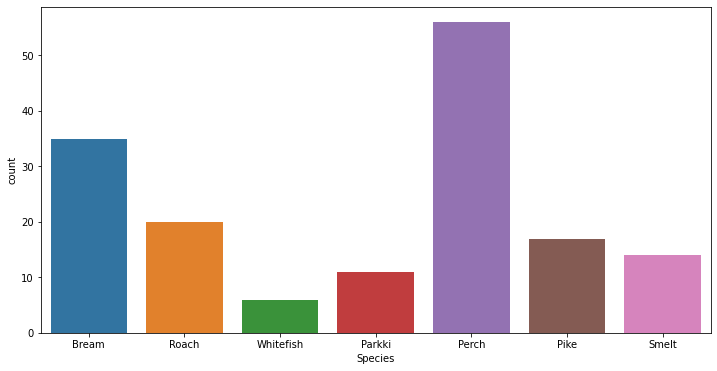

In [7]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x = 'Species', data = df)
plt.show()

<Figure size 1080x432 with 0 Axes>

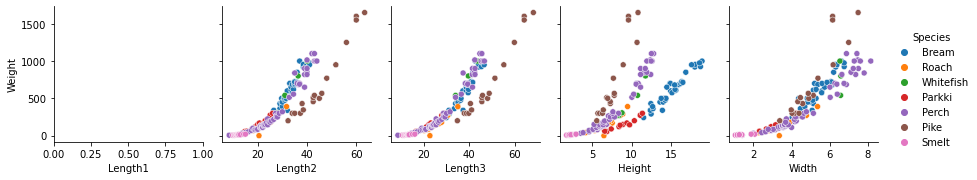

In [8]:
plt.figure(figsize=(15,6))
sns.pairplot(data= df,
             x_vars = ['Length1','Length2','Length3','Height','Width'],
             y_vars = 'Weight', 
             hue = 'Species')
plt.show()

In [9]:
#weight has linear corelation with other variable

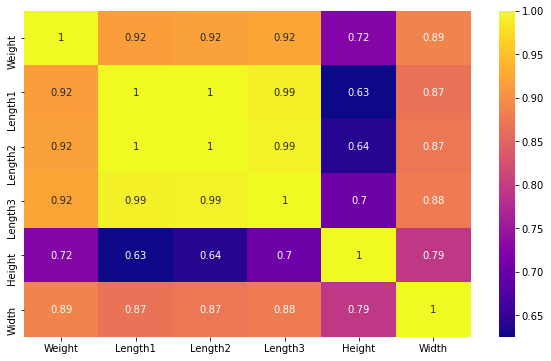

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True, cmap='plasma')
plt.show()

In [11]:
#multi co lineraty 

In [39]:
#Distribution of data

<Figure size 1080x432 with 0 Axes>

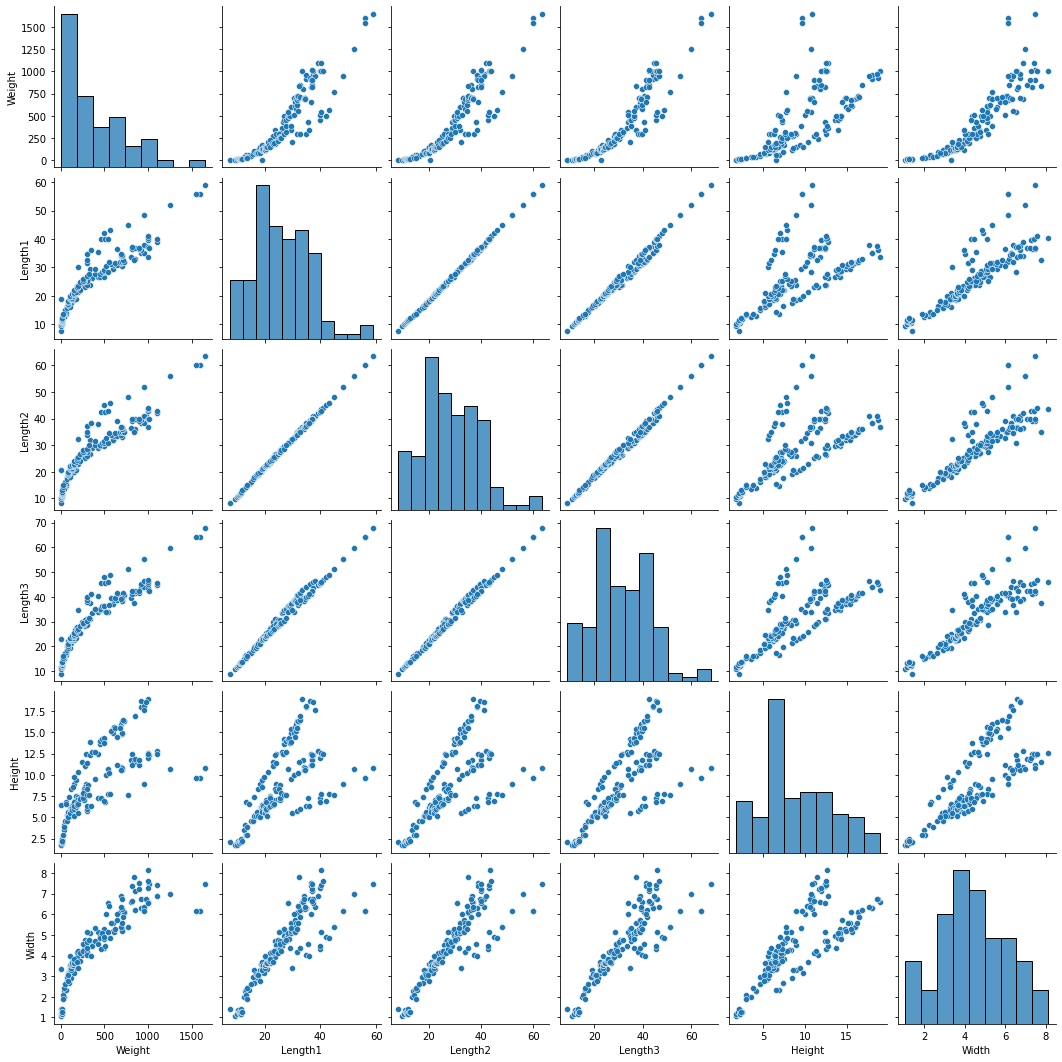

In [12]:
plt.figure(figsize=(15,6))
sns.pairplot(data= df)
plt.show()

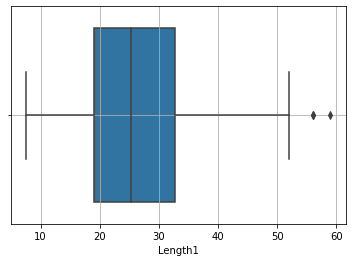

In [13]:
sns.boxplot(data=df, x=df["Length1"])
plt.grid()

In [14]:
df[(df["Length1"]>53)]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


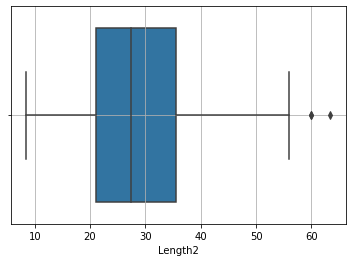

In [15]:
sns.boxplot(data=df, x=df["Length2"])
plt.grid()

In [16]:
df[(df["Length2"]>58)]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


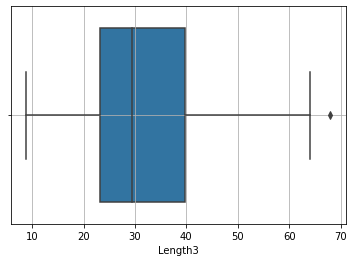

In [17]:
sns.boxplot(data=df, x=df["Length3"])
plt.grid()

In [18]:
df[(df["Length3"]>65)]

,Species,Weight,Length1,Length2,Length3,Height,Width
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.48


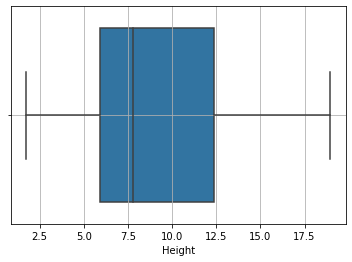

In [19]:
sns.boxplot(data=df, x=df["Height"])
plt.grid()

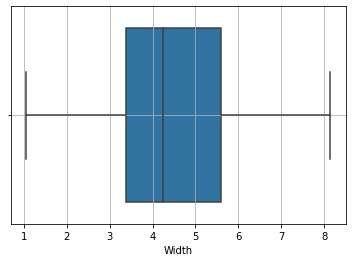

In [20]:
sns.boxplot(data=df, x=df["Width"])
plt.grid()

In [21]:
#outliers present in 142, 143, 144

In [22]:
df.drop([142,143,144], axis =0, inplace=True)

In [23]:
df.corr().style.background_gradient()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.895743,0.899759,0.907292,0.801871,0.923432
Length1,0.895743,1.000000,0.999418,0.990612,0.676326,0.889166
Length2,0.899759,0.999418,1.000000,0.993049,0.691954,0.895584
Length3,0.907292,0.990612,0.993049,1.000000,0.756019,0.897053
Height,0.801871,0.676326,0.691954,0.756019,1.000000,0.800542
Width,0.923432,0.889166,0.895584,0.897053,0.800542,1.000000


In [24]:
#drop length2 and length 3 due to multicolinearity

In [25]:
df.drop(['Length2', 'Length3'], axis=1, inplace=True)

In [26]:
x=df.iloc[:,2:]
y=df.iloc[:,1]

In [27]:
x

,Length1,Height,Width
0,23.2,11.5200,4.0200
1,24.0,12.4800,4.3056
2,23.9,12.3778,4.6961
3,26.3,12.7300,4.4555
4,26.5,12.4440,5.1340
...,...,...,...
154,11.5,2.0904,1.3936
155,11.7,2.4300,1.2690
156,12.1,2.2770,1.2558
157,13.2,2.8728,2.0672


In [28]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 156, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [30]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(xtrain, ytrain)
ypred = linreg.predict(xtest)

In [31]:
linreg.coef_

array([12.26051956, 13.6644461 , 82.46520645])

In [32]:
linreg.intercept_

-436.8490913116991

In [33]:
pd.DataFrame(linreg.coef_, index=x.columns, columns=["Coefficients"])

,Coefficients
Length1,12.260520
Height,13.664446
Width,82.465206


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred)

print(f"MAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\nAccuracy : {r2}")

MAE : 111.12295363686894
MSE : 18121.326318207717
RMSE : 134.6154757752901
Accuracy : 0.8724567171113486


In [35]:
train = linreg.score(xtrain, ytrain)
test = linreg.score(xtest, ytest)

print(f"training :{train}\ntesting{test}: ")

training :0.9032185079615295
testing0.8724567171113486: 


In [36]:
def predictWeight(L,H,W):
    newobs=[[L,H,W]]
    yp = linreg.predict(newobs)[0]
    print(F"the Weight of fish is {yp}")
    return yp

In [38]:
L = float(input("enter length"))
H = float(input("enter Height"))
W = float(input("enter Width"))


predictWeight(L,H,W)

enter length22.4
enter Height5.4
enter Width3.2
the Weight of fish is 175.4632164828738


175.4632164828738